## IMPORTING PACKAGES

In [33]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [2]:
%cd "C:\Users\itsfe\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study"


C:\Users\itsfe\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study


In [3]:
claims=pd.read_csv('claims.csv')
cust=pd.read_csv('cust_demographics.csv')
claims_cust=pd.merge(how='left',left=claims,right=cust,left_on='customer_id',right_on='CUST_ID')
claims_cust

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Perform a data audit for the datatypes and find out if there are mismatch within the current datatypes of the columns and their business significance.

In [4]:
claims_cust["claim_date"]=pd.to_datetime(claims_cust["claim_date"])
claims_cust["DateOfBirth"]=pd.to_datetime(claims_cust["DateOfBirth"])
claims_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  CUST_ID              1085 non-null   float64       
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [5]:
claims_cust['claim_amount']=claims_cust['claim_amount'].str.replace('$','')
claims_cust.claim_amount.astype('float64')
claims_cust

C:\Users\itsfe\AppData\Local\Temp\ipykernel_33340\3323891142.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claims_cust['claim_amount']=claims_cust['claim_amount'].str.replace('$','')


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN


## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [6]:
injury=claims_cust[claims_cust.claim_type=='Injury only']
injury['alert_flag']=np.where(injury.police_report=='No','0',(np.where(injury.police_report=='Yes','1','Unknown')))
injury

C:\Users\itsfe\AppData\Local\Temp\ipykernel_33340\3897031616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury['alert_flag']=np.where(injury.police_report=='No','0',(np.where(injury.police_report=='Yes','1','Unknown')))


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,0
14,67257404,18288638,Other driver error,2018-04-24,Auto,Yes,Injury only,32560,1.0,No,18288638.0,Female,2069-01-14,MI,314-135-1359,Platinum,1
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800,1.0,No,63916778.0,Male,2066-09-07,IL,146-157-4572,Platinum,0
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380,1.0,No,17004138.0,Female,2065-08-13,WA,436-354-4682,Silver,0
19,19051665,9667764,Other causes,2017-12-17,Auto,Yes,Injury only,36190,1.0,No,9667764.0,Female,1979-10-10,SC,643-978-8251,Platinum,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,56358443,75934330,Natural causes,2017-01-01,Auto,Yes,Injury only,20630,1.0,No,75934330.0,Female,1987-10-09,ME,951-941-3975,Platinum,1
1072,50800999,51669975,Other causes,2018-09-19,Home,Yes,Injury only,38950,1.0,No,51669975.0,Female,1988-02-05,ND,975-463-9541,Silver,1
1074,36599575,87596868,Driver error,2018-10-09,Auto,Unknown,Injury only,33330,2.0,No,87596868.0,Male,2061-11-18,AZ,573-396-3182,Silver,Unknown
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080,2.0,No,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,1


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [7]:
claims_cust['claim_date']=claims_cust.claim_date.astype('datetime64')
unique=pd.pivot_table(data=claims_cust,values='claim_date',index='customer_id',aggfunc='min')
unique

,claim_date
customer_id,
154557,2018-04-10
263204,2018-04-04
287476,2017-10-17
441097,2018-03-21
524545,2018-07-27
...,...
99674324,2018-07-07
99723844,2018-01-06
99761663,2018-04-04


## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [30]:
cat_col = ["CUST_ID","gender","DateOfBirth","State","Segment","total_policy_claims","Contact"]
con_col = ['claim_amount']
#claimid, claim_date

for col in cat_col:
    claims_cust[col] = claims_cust[col].fillna(claims_cust[col].mode()[0])

claims_cust[con_col] = claims_cust[con_col].fillna(claims_cust[con_col].mean())


# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60


In [9]:

claims_cust.claim_date=claims_cust.claim_date.astype('datetime64')
claims_cust.DateOfBirth=claims_cust.DateOfBirth.astype('datetime64')
claims_cust['Age']=claims_cust.claim_date.dt.year-claims_cust.DateOfBirth.dt.year
claims_cust['Age_category']=np.where(claims_cust.Age<18,'Children',(np.where(claims_cust.Age<30,'Youth',(np.where(claims_cust.Age<60,'Adult','Senior')))))

In [10]:
claims_cust.claim_amount=claims_cust.claim_amount.astype(float)  

## 8. What is the average amount claimed by the customers from various segments?

In [11]:

claims_cust.groupby(by="Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12764.639946
Platinum,12336.517291
Silver,12185.751562


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [12]:
incident=claims_cust[(claims_cust.claim_date<'2018-10-01')&(claims_cust.claim_date>'2018-09-10')]
pd.pivot_table(data=incident,values='claim_amount',index='incident_cause',aggfunc='sum')


,claim_amount
incident_cause,
Crime,6840.0
Driver error,2130.0
Natural causes,8418.0
Other causes,234756.0
Other driver error,47599.5


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [13]:
claims_cust[(claims_cust.Age_category=='Adult')&((claims_cust.incident_cause=='Driver error')|(claims_cust.incident_cause=='Other driver error'))&((claims_cust.State=='TX')|(claims_cust.State=='DE')|(claims_cust.State=='AK'))].Age_category.count()


17

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

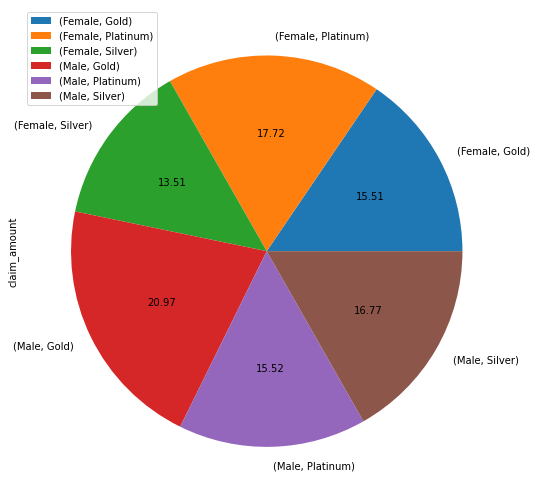

In [14]:
amount=claims_cust.groupby(by=['gender','Segment'])[['claim_amount']].sum().plot(kind='pie',autopct='%3.2f',subplots=True,figsize=[13.5,9])
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

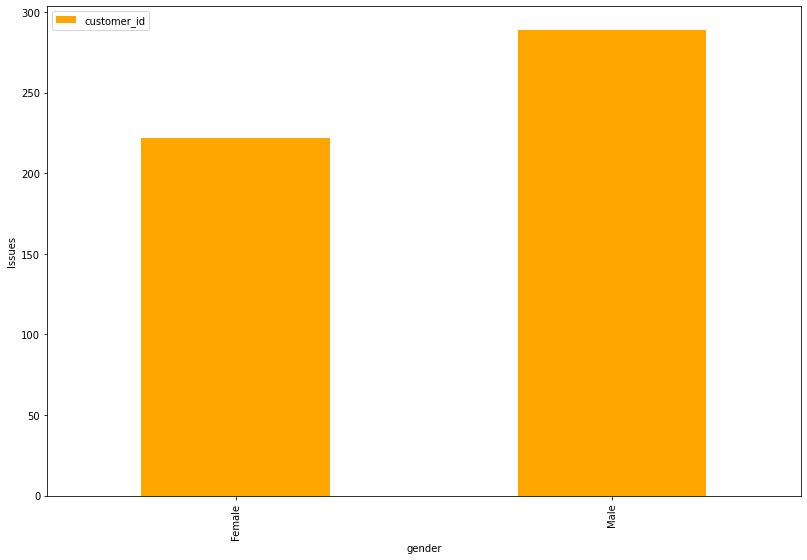

In [15]:
claims_cust[(claims_cust.incident_cause=='Driver error')|(claims_cust.incident_cause=='Other driver error')].groupby(by='gender')[['customer_id']].count().plot(kind='bar',figsize=[13.5,9],color='orange',ylabel='Issues')
plt.show()        
        

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

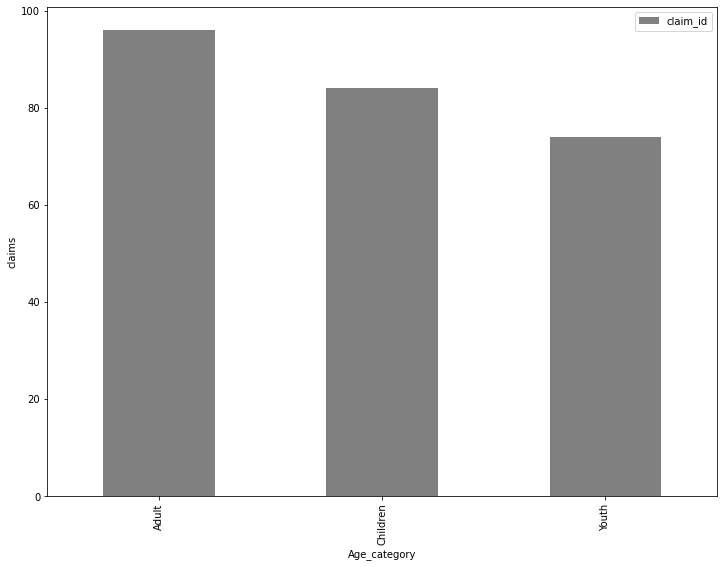

In [16]:
claims_cust[claims_cust.fraudulent=='Yes'].groupby(by='Age_category')[['claim_id']].count().plot(kind='bar',color='grey',ylabel='claims',figsize=[12,9])
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

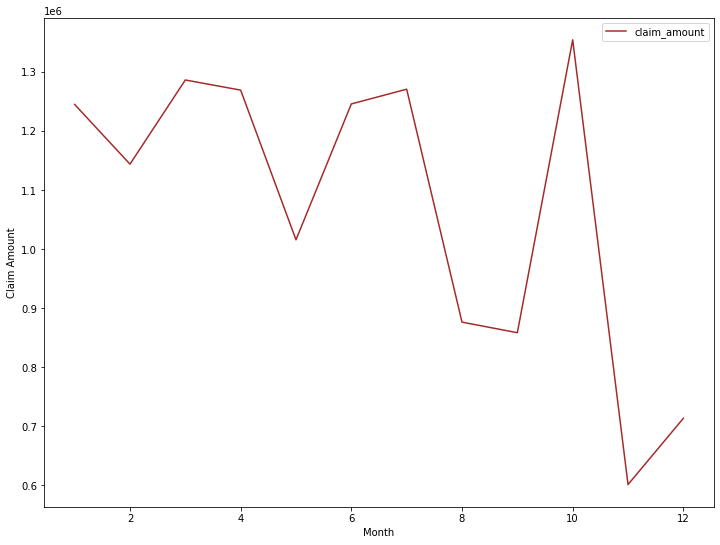

In [17]:
claims_cust['Month']=claims_cust.claim_date.dt.month
claims_cust.groupby(by='Month')[['claim_amount']].sum().plot(kind='line',color='brown',ylabel='Claim Amount',figsize=[12,9])
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

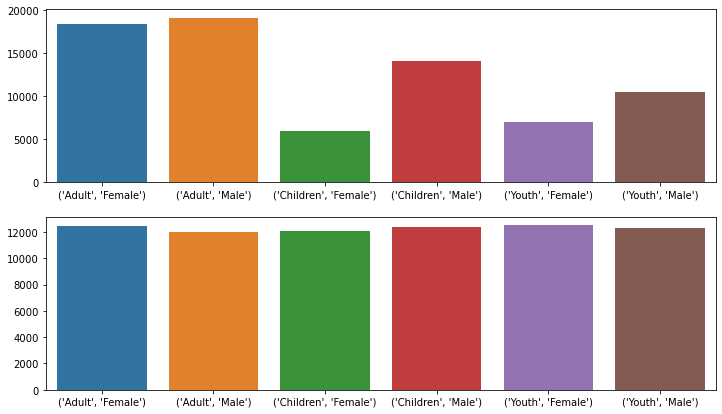

In [18]:
fraud=claims_cust[claims_cust.fraudulent=='Yes']
non_fraud=claims_cust[claims_cust.fraudulent=='No']
fraudt=pd.pivot_table(data=fraud,values='claim_amount',columns=['Age_category','gender'],aggfunc='mean')
non_fraudt=pd.pivot_table(data=non_fraud,values='claim_amount',columns=['Age_category','gender'],aggfunc='mean')
fig,axes=plt.subplots(2,1,figsize=[12,7])
sns.barplot(data=fraudt,ax=axes[0])
sns.barplot(data=non_fraudt,ax=axes[1])
plt.show()


## 16. Is there any similarity in the amount claimed by males and females?

In [19]:

female=claims_cust[claims_cust.gender=='Female']
male=claims_cust[claims_cust.gender=='Male']


The variables considered for hypothesis testing are gender and claim_amount

## Step1

## Defining Parameters

Null Hypothesis,H0: Claim Amount of males = claim amount of females.

Alternative Hypothesis,Ha : Claim Amount of males != claim amount of females.

## Step 2

## T Test 

In [20]:
import scipy
from scipy import stats
ttest,p_value=stats.ttest_ind(female.claim_amount,male.claim_amount)
print(p_value)
if p_value>0.05:
    print('The two variables are similar.')
else:
    print('The two variables are not similar. ')

nan
The two variables are not similar. 


## Step 3

# Conclusion

Since the pvalue is much greater, we cannot reject null hypothesis. Hence there is a similarity in the amount claimed by the males and females.

## 17. Is there any relationship between age category and segment?

## Step1

## Defining Parameters

Null Hypothesis,H0: Age category and Segment are not related.

Alternative Hypothesis,Ha: Age category and Segment are related.

## Step 2

## Chi-square Test

In [21]:
contingency=pd.crosstab(claims_cust.Segment,claims_cust.Age_category)
chi2,pval,dof,expected_values=stats.chi2_contingency(contingency)
print(pval)
if pval<0.05:
    print('Segment and Age category are dependent' )
else:
    print('Segment and Age category are independent')

0.28014200887776347
Segment and Age category are independent


## Step 3

## Conclusion

Since the pvalue is greater than o.o5,we have to accept H0,ie there is no significant relation between Age_category and Segment.

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [22]:
claims_cust['Year']=claims_cust.claim_date.dt.year
yearly=claims_cust[claims_cust.Year==2018]
fisc_avg=yearly.claim_amount.mean()
print(f'The average of claim amount in 2018 is:{fisc_avg}')

The average of claim amount in 2018 is:12652.485869565216


## Step1

## Defining Parameters

Null Hypothesis,H0: Claim amount of 2018<= 10,000

Alternative Hypothesis,Ha: Claim amount of 2018 > 10,000

## Step 2

 ## One Sampled T-Test

In [23]:
ttest,pval=stats.ttest_1samp(yearly.claim_amount,10000)
print(pval)
if pval<0.05:
    print('There is no significant increase in claim amount')
else:
    print('There is significant increase in claim amount')

nan
There is significant increase in claim amount


## Step 3

## Conclusion

Since pvalue is less than 0.05,we cannot reject null hypothesis H0, ie, there is no significant increase in Claim amount in 2018 compared to 2016-'17.

## 19. Is there any difference between age groups and insurance claims?

In [24]:
children=claims_cust[claims_cust.Age_category=='Children']
youth=claims_cust[claims_cust.Age_category=='Youth']
adult=claims_cust[claims_cust.Age_category=='Adult']
print(f'The total policy claims by children is {children.total_policy_claims.mean()}')
print(f'The total policy claims by youth is {youth.total_policy_claims.mean()}')
print(f'The total policy claims by adults is {adult.total_policy_claims.mean()}')

The total policy claims by children is 1.5922619047619047
The total policy claims by youth is 1.6160990712074303
The total policy claims by adults is 1.560090702947846


## Step1

## Defining Parameters

Null Hypothesis,H0: Average policy claims of children= Average policy claims of youth= Average policy claims of adult

Alternative hypothesis,Ha:Average policy claims of children<> Average policy claims of youth<>Average policy claims of adult

## Step2

 ## Anova Test

In [25]:
f_stat,pval=stats.f_oneway(children.total_policy_claims,youth.total_policy_claims,adult.total_policy_claims)
print(f'pvalue is:{pval}')
if pval<0.05:
    print('There is no significant difference in policy claims with age category')
else:
    print('There is significant difference in policy claims with age category')

pvalue is:0.7947357764556859
There is significant difference in policy claims with age category


## Step3

## Conclusion

Since the pvalue is greater than 0.05, we cannot reject H0 ,ie,there is significant difference between all three variables.

## 20. Is there any relationship between total number of policy claims and the claimed amount?


In [32]:
policy_claims=claims_cust.total_policy_claims.mean()
claim_amount=claims_cust.claim_amount.mean()
print(f'Average number of policy claims is: {policy_claims}')
print(f'Average claim amount is: {claim_amount}')

Average number of policy claims is: 1.5863636363636364
Average claim amount is: 12442.125120772922


## Step1

## Defining Parameters

Null Hypothesis,H0: There is no significant relationship between policy claims and claimed amount

Alternative Hypothesis,Ha: There is significant relationship between policy claims and claimed amount

## Step2

## Correlation Test

In [31]:
rvalue,pval=stats.pearsonr(claims_cust.total_policy_claims,claims_cust.claim_amount)
print(f'rvalue is:{rvalue}')
print(f'pvalue is: {pval}')
if pval<0.05:
     print('There is a significant relationship between policy claims and claimed amount')
else:
     print('There is no significant relationship between policy claims and claimed amount')


rvalue is:-0.019998015793509932
pvalue is: 0.5076051510518916
There is no significant relationship between policy claims and claimed amount


## Step3

## Conclusion

Since the pvalue is greater than 0.05, we cannot reject H0, ie, there is no significant relationship between policy claims and claimed amount